# Demo MAGxHR_1B (magnetic field 50Hz)

> Authors: Ashley Smith
>
> Abstract: Access to the high rate (50Hz) magnetic data (level 1b product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

2020-03-12T14:45:11+00:00

CPython 3.7.6
IPython 7.11.1

viresclient 0.6.0
pandas 0.25.3
xarray 0.15.0
matplotlib 3.1.2


In [2]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
request = SwarmRequest()

## MAGX_HR_1B product information

The 50Hz measurements of the magnetic field vector (`B_NEC`) and total intensity (`F`).

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-1b-product-definitions#MAGX_HR_1B_Product

Measurements are available through VirES as part of collections with names containing `MAGx_HR`, for each Swarm spacecraft:

In [4]:
request.available_collections("MAG_HR", details=False)

{'MAG_HR': ['SW_OPER_MAGA_HR_1B', 'SW_OPER_MAGB_HR_1B', 'SW_OPER_MAGC_HR_1B']}

The measurements can be used together with geomagnetic model evaluations as shall be shown below.

### Check what "MAG" data variables are available

In [5]:
request.available_measurements("MAG_HR")

['F',
 'B_VFM',
 'B_NEC',
 'dB_Sun',
 'dB_AOCS',
 'dB_other',
 'B_error',
 'q_NEC_CRF',
 'Att_error',
 'Flags_B',
 'Flags_q',
 'Flags_Platform',
 'ASM_Freq_Dev']

## Fetch data

In [6]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_HR_1B")
request.set_products(
   measurements=request.PRODUCT_VARIABLES['MAG_HR'],
   sampling_step="PT0.019S", # ~50Hz sampling
)
data = request.get_between(
   start_time="2015-06-21T12:00:00Z", 
   end_time="2015-06-21T12:01:00Z",
   asynchronous=False
)

      Downloading: 100%|█████████████████████████████████████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.714MB)


In [7]:
data.sources

['SW_OPER_MAGA_HR_1B_20150621T000000_20150621T235959_0505_MDR_MAG_HR']

In [8]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:         (NEC: 3, Timestamp: 3000, VFM: 3, quaternion: 4)
Coordinates:
  * Timestamp       (Timestamp) datetime64[ns] 2015-06-21T12:00:00.007250071 ... 2015-06-21T12:00:59.983929634
  * NEC             (NEC) <U1 'N' 'E' 'C'
  * VFM             (VFM) <U1 'i' 'j' 'k'
  * quaternion      (quaternion) <U1 '1' 'i' 'j' 'k'
Data variables:
    Spacecraft      (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    F               (Timestamp) float64 2.109e+04 2.109e+04 ... 2.087e+04
    B_VFM           (Timestamp, VFM) float64 -1.562e+04 -4.153e+03 ... -1.34e+04
    dB_AOCS         (Timestamp, VFM) float64 0.1054 -0.2643 ... -0.1057 -4.884
    q_NEC_CRF       (Timestamp, quaternion) float64 0.0006543 -0.006776 ... -1.0
    Radius          (Timestamp) float64 6.837e+06 6.837e+06 ... 6.836e+06
    Longitude       (Timestamp) float64 -17.17 -17.17 -17.17 ... -17.12 -17.12
    Flags_Platform  (Timestamp) uint16 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    B_NEC           (Timestamp, NEC) float64 9.677e+03 -3.495e+03 ... -1.817e+04
    Latitude        (Timestamp) float64 -41.84 -41.83 -41.83 ... -38.01 -38.01
    Flags_B         (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    dB_other        (Timestamp, VFM) float64 0.0349 0.0184 ... 0.019 -0.0463
    Flags_q         (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    dB_Sun          (Timestamp, VFM) float64 0.7188 -0.6263 ... -0.4607 -0.0792
    Att_error       (Timestamp) float64 1.365 1.365 1.365 ... 1.138 1.137 1.136
    B_error         (Timestamp, VFM) float64 0.2217 0.2219 ... 0.2167 0.4135
Attributes:
    Sources:         ['SW_OPER_MAGA_HR_1B_20150621T000000_20150621T235959_050...
    MagneticModels:  []
    RangeFilters:    []

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


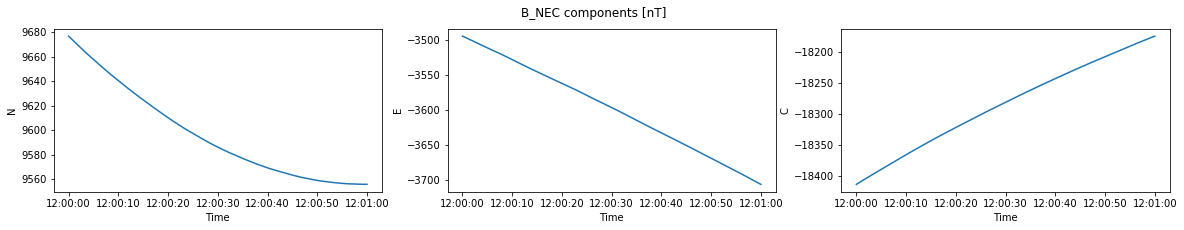

In [9]:
fig, axes = plt.subplots(figsize=(20, 3), ncols=3, sharex=True)
for i in range(3):
    axes[i].plot(ds["Timestamp"], ds["B_NEC"][:, i])
    axes[i].set_ylabel("NEC"[i])
    axes[i].set_xlabel("Time")
fig.suptitle("B_NEC components [nT]");

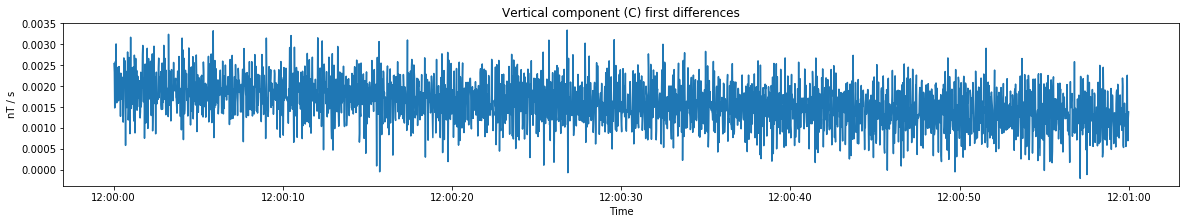

In [10]:
import numpy as np

fig, ax = plt.subplots(figsize=(20, 3))
dBdt = np.diff(ds["B_NEC"], axis=0) * (1/50)
ax.plot(ds["Timestamp"][1:], dBdt[:, 2])
ax.set_ylabel("nT / s")
ax.set_xlabel("Time")
ax.set_title("Vertical component (C) first differences");